In [17]:
import pandas as pd
#pd.set_option('display.max_columns', None)
import numpy as np
#from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
import pickle, re
import pysam

In [2]:
df= pd.read_csv("/data/projects/GDC_Cancer_Wise/Brain/Data/DNABERT_result/Acceptor/df_log_odd_score.tsv", sep="\t")
df.rename(columns={'Patient_ID': 'File_ID'}, inplace=True)
df

,File_ID,chr1_13412_13491_13417_13418,chr1_183091_183170_183143_183144,chr1_187248_187327_187301_187302,chr1_268081_268160_268129_268130,chr1_268777_268856_268832_268833,chr1_505064_505143_505073_505074,chr1_628184_628263_628244_628245,chr1_792841_792920_792861_792862,chr1_801124_801203_801141_801142,...,chr9_61968410_61968489_61968459_61968460,chr11_4049473_4049552_4049490_4049502,chr13_101176335_101176414_101176394_101176395,chr16_31844_31923_31879_31880,chr17_420631_420710_420634_420660,chr22_21484095_21484174_21484115_21484116,chr5_7896823_7896902_7896843_7896855,chr9_2647433_2647512_2647433_2647434,chr9_85840709_85840788_85840736_85840746,chrY_6868870_6868949_6868906_6868907
0,722d3df5-7254-44f0-bbe0-cf39dbd57866,0.553559,0.415038,-0.384897,-5.024607,0.823919,2.574861,-1.105056,4.800413,3.202229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ddd29528-58ad-461f-8509-4e42f71b49fb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9593d4de-0dab-4d1e-b86c-af91cac938e6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e849abef-b55e-4124-b760-09101a7c4390,NaN,NaN,-0.384897,-5.024607,NaN,NaN,-1.105056,4.800413,3.202229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0c700657-b0b8-4361-9f89-b89a6c7b262d,NaN,NaN,NaN,-5.024607,NaN,NaN,NaN,4.800413,3.202229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,07dde76e-e126-4d66-ba85-059f076b7d04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,6f920119-c9ad-4ebf-bbc8-7724feae7b7b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,0105bc7d-a1cd-44d1-b533-b47a9781c0a5,NaN,NaN,-0.384897,-5.024607,NaN,NaN,-1.105056,4.800413,3.202229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,50014300-ff2e-49f6-857d-dd3e1f22a588,0.553559,NaN,-0.384897,-5.024607,NaN,NaN,-1.105056,NaN,3.202229,...,0.050627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Load the text file into a pandas DataFrame
manifest_df = pd.read_csv('/data/projects/GDC_Cancer_Wise/Brain/Postprocessing_files/updated_manifest_clinical.tsv', sep='\t')
manifest_df

,id,filename,md5,size,state,case_UUID,TCGA_barcode,biospecimen,case_id,case_submitter_id,...,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type,file_path
0,8a5741e3-ade9-4aa0-bf16-fda229785973,96ef40c3-8d4c-4fe1-a33a-99f5b205a0bb_wgs_gdc_r...,872f8936e6da37d65ad164008be0d97e,224307907152,released,12824b2b-9c0a-4dcf-8941-34593a4e93da,TCGA-14-0786-01B-01D-0932-09,Primary Solid Tumor,12824b2b-9c0a-4dcf-8941-34593a4e93da,TCGA-14-0786,...,'--,'--,'--,'--,'--,'--,yes,'--,"['Radiation Therapy, NOS', 'Pharmaceutical The...",/data/projects/GDC_Cancer_Wise/Brain/Data/all_...
1,92d4df10-dc24-495c-889f-98fe42259a3d,6050f994-f394-4c1c-93ce-d36733aa9ae9_wgs_gdc_r...,22e70f4babc0dbc558899362c29d0144,255133476881,released,1b6c184a-5868-4a51-8a82-aa16a7e65126,TCGA-06-0881-10A-01D-0512-09,Blood Derived Normal,1b6c184a-5868-4a51-8a82-aa16a7e65126,TCGA-06-0881,...,'--,'--,'--,'--,'--,'--,yes,'--,"['Radiation Therapy, NOS', 'Pharmaceutical The...",/data/projects/GDC_Cancer_Wise/Brain/Data/all_...
2,31261c79-49e6-4e8e-9135-7445a93d3ff6,7cae6c0b-36fe-411b-bbba-093a4c846d84_wgs_gdc_r...,b0a73ce14e054c4cb548b82cd4705090,433608688882,released,0078b0c4-68a9-483b-9aab-61156d263213,TCGA-14-1034-02B-01D-2280-08,Recurrent Solid Tumor,0078b0c4-68a9-483b-9aab-61156d263213,TCGA-14-1034,...,'--,'--,'--,'--,'--,'--,yes,'--,"['Pharmaceutical Therapy, NOS', 'Radiation The...",/data/projects/GDC_Cancer_Wise/Brain/Data/all_...
3,03ec9184-c32b-40ec-90f6-fcb9ac13897c,e8114ae7-e076-44ca-b2bb-b6c3629b53b0_wgs_gdc_r...,06b5e42fd7c52228a60af4dfffa39168,181458921470,released,12824b2b-9c0a-4dcf-8941-34593a4e93da,TCGA-14-0786-10A-01D-0703-09,Blood Derived Normal,12824b2b-9c0a-4dcf-8941-34593a4e93da,TCGA-14-0786,...,'--,'--,'--,'--,'--,'--,yes,'--,"['Radiation Therapy, NOS', 'Pharmaceutical The...",/data/projects/GDC_Cancer_Wise/Brain/Data/all_...
4,8b174bed-2bd0-4318-8831-8676df9af5a0,b73cfd2e-044f-4b41-b404-080d9d18e61d_wgs_gdc_r...,9c2f64092e527de61125f7862d40c28d,224484119834,released,12824b2b-9c0a-4dcf-8941-34593a4e93da,TCGA-14-0786-01B-01D-0703-09,Primary Solid Tumor,12824b2b-9c0a-4dcf-8941-34593a4e93da,TCGA-14-0786,...,'--,'--,'--,'--,'--,'--,yes,'--,"['Radiation Therapy, NOS', 'Pharmaceutical The...",/data/projects/GDC_Cancer_Wise/Brain/Data/all_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,b53ad5a6-36a2-455a-8769-897c0adfb500,5844876a-d390-4c02-acb9-f32647ca7375_wgs_gdc_r...,42a5d186bc01b316584d8041e2c1f879,181285406230,released,799e9106-e62e-4681-8861-137f474ee8b8,TCGA-HT-7602-10A-01D-2086-08,Blood Derived Normal,799e9106-e62e-4681-8861-137f474ee8b8,TCGA-HT-7602,...,'--,'--,'--,'--,'--,'--,no,'--,"['Radiation Therapy, NOS', 'Pharmaceutical The...",/data/projects/GDC_Cancer_Wise/Brain/Data/all_...
288,87113bda-e063-4f2c-9ac2-5f02a05d3a9c,45ec553b-1e7a-4b3c-86a1-c3f1547c1b43_wgs_gdc_r...,584a461967b5853754ffcfce5c5b1c7c,166265961267,released,7e41baba-7ef6-4030-b595-d95cd96336b5,TCGA-HT-A5R7-10A-01D-A289-08,Blood Derived Normal,7e41baba-7ef6-4030-b595-d95cd96336b5,TCGA-HT-A5R7,...,'--,'--,'--,'--,'--,'--,yes,'--,"['Pharmaceutical Therapy, NOS', 'Radiation The...",/data/projects/GDC_Cancer_Wise/Brain/Data/all_...
289,4d278e32-a900-4d28-87be-575ca498db24,8f524ded-7ae8-44cd-8e62-5db87178452c_wgs_gdc_r...,e7f743f51d4092daa2723596c5099919,32477896026,released,834e560a-a506-456d-baf2-a206ca058153,TCGA-DU-7010-10A-01D-2022-02,Blood Derived Normal,834e560a-a506-456d-baf2-a206ca058153,TCGA-DU-7010,...,'--,'--,'--,'--,'--,'--,yes,'--,"['Pharmaceutical Therapy, NOS', 'Radiation The...",/data/projects/GDC_Cancer_Wise/Brain/Data/all_...
290,6788564d-7cfb-4bc2-a6e1-010337a37210,3ef3e4f1-9b47-4f11-9024-85242ecee397_wgs_gdc_r...,a9407d6da48c9a4c7afcc38b175a7ed0,39333905005,released,834e560a-a506-456d-baf2-a206ca058153,TCGA-DU-7010-01A-11D-2022-02,Primary Solid Tumor,834e560a-a506-456d-baf2-a206ca058153,TCGA-DU-70

In [9]:
manifest_df.groupby('biospecimen').size()

biospecimen
Blood Derived Normal     138
Primary Solid Tumor      130
Recurrent Solid Tumor     24
dtype: int64

In [4]:
#Create a mapping from the filename prefix to the id
mapping = manifest_df.set_index(manifest_df['filename'].str.extract(r'(.+)_wgs_gdc_realn.bam')[0])['TCGA_barcode'].to_dict()
case_uuid_mapping = manifest_df.set_index(manifest_df['filename'].str.extract(r'(.+)_wgs_gdc_realn.bam')[0])['case_UUID'].to_dict()
biospecimen_mapping = manifest_df.set_index(manifest_df['filename'].str.extract(r'(.+)_wgs_gdc_realn.bam')[0])['biospecimen'].to_dict()
submitter_mapping = manifest_df.set_index(manifest_df['filename'].str.extract(r'(.+)_wgs_gdc_realn.bam')[0])['case_submitter_id'].to_dict()
file_mapping = manifest_df.set_index(manifest_df['filename'].str.extract(r'(.+)_wgs_gdc_realn.bam')[0])['file_path'].to_dict()


# Mapping TCGA_barcode, case_UUID, and biospecimen to df based on File_ID extracted from the filename
df['TCGA_barcode'] = df['File_ID'].map(mapping)  # This line should already exist in your code
df['case_UUID'] = df['File_ID'].map(case_uuid_mapping)
df['biospecimen'] = df['File_ID'].map(biospecimen_mapping)
df['case_submitter_id'] = df['File_ID'].map(submitter_mapping)
df['file_path']= df['File_ID'].map(file_mapping)

# Reordering the columns so that TCGA_barcode, case_UUID, and biospecimen are at the beginning
df.insert(0, 'case_submitter_id', df.pop('case_submitter_id'))
df.insert(1, 'TCGA_barcode', df.pop('TCGA_barcode'))
df.insert(2, 'case_UUID', df.pop('case_UUID'))
df.insert(3, 'biospecimen', df.pop('biospecimen'))
df.insert(4, 'file_path', df.pop('file_path'))
df
#mapping

,case_submitter_id,TCGA_barcode,case_UUID,biospecimen,file_path,File_ID,chr1_13412_13491_13417_13418,chr1_183091_183170_183143_183144,chr1_187248_187327_187301_187302,chr1_268081_268160_268129_268130,...,chr9_61968410_61968489_61968459_61968460,chr11_4049473_4049552_4049490_4049502,chr13_101176335_101176414_101176394_101176395,chr16_31844_31923_31879_31880,chr17_420631_420710_420634_420660,chr22_21484095_21484174_21484115_21484116,chr5_7896823_7896902_7896843_7896855,chr9_2647433_2647512_2647433_2647434,chr9_85840709_85840788_85840736_85840746,chrY_6868870_6868949_6868906_6868907
0,TCGA-TQ-A8XE,TCGA-TQ-A8XE-10A-01D-A367-08,135a149a-d153-465e-aa58-06d47bb18e00,Blood Derived Normal,/data/projects/GDC_Cancer_Wise/Brain/Data/all_...,722d3df5-7254-44f0-bbe0-cf39dbd57866,0.553559,0.415038,-0.384897,-5.024607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-CS-4938,TCGA-CS-4938-10A-01D-1891-02,334f715e-08dc-4a29-b8e4-b010b829c478,Blood Derived Normal,/data/projects/GDC_Cancer_Wise/Brain/Data/all_...,ddd29528-58ad-461f-8509-4e42f71b49fb,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-DU-6405,TCGA-DU-6405-01A-11D-1703-02,9239a22e-80b1-49a2-b0d5-cbab7e415254,Primary Solid Tumor,/data/projects/GDC_Cancer_Wise/Brain/Data/all_...,9593d4de-0dab-4d1e-b86c-af91cac938e6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-DH-A669,TCGA-DH-A669-10A-01D-A31J-08,76e54ef6-1799-4fd9-bec3-0ea960e8461e,Blood Derived Normal,/data/projects/GDC_Cancer_Wise/Brain/Data/all_...,e849abef-b55e-4124-b760-09101a7c4390,NaN,NaN,-0.384897,-5.024607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-06-0145,TCGA-06-0145-10A-01D-0507-08,3258cb3b-f63b-463c-b2e4-d638149157c5,Blood Derived Normal,/data/projects/GDC_Cancer_Wise/Brain/Data/all_...,0c700657-b0b8-4361-9f89-b89a6c7b262d,NaN,NaN,NaN,-5.024607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,TCGA-HW-7495,TCGA-HW-7495-01A-11D-2022-02,49967a57-7c12-46bb-8d71-cebbb17c9935,Primary Solid Tumor,/data/projects/GDC_Cancer_Wise/Brain/Data/all_...,07dde76e-e126-4d66-ba85-059f076b7d04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,TCGA-FG-5963,TCGA-FG-5963-10A-01D-1703-02,68f550ca-3a33-45e4-b1c9-14f99e543263,Blood Derived Normal,/data/projects/GDC_Cancer_Wise/Brain/Data/all_...,6f920119-c9ad-4ebf-bbc8-7724feae7b7b,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,TCGA-06-0648,TCGA-06-0648-10A-01D-0507-08,ef6f6553-2575-457e-bc07-401215e54759,Blood Derived Normal,/data/projects/GDC_Cancer_Wise/Brain/Data/all_...,0105bc7d-a1cd-44d1-b533-b47a9781c0a5,NaN,NaN,-0.384897,-5.024607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,TCGA-DU-5872,TCGA-DU-5872-02A-21D-A36O-08,48607130-c09a-491d-882f-7d2591d13182,Recurrent Solid Tumor,/data/projects/GDC_Cancer_Wise/Brain/Data/all_...,50014300-ff2e-49f6-857d-dd3e1f22a588,0.553559,NaN,-0.384897,-5.024607,...,0.050627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Group the DataFrame by 'case_submitter_id'
grouped = df.groupby('case_submitter_id')

In [6]:
# Initialize a list to hold the lengths
group_lengths = []

# Iterate over each group to calculate the length
for _, group in grouped:
    group_lengths.append(len(group))

# Convert the lengths list to a Series
lengths_series = pd.Series(group_lengths)

# Get the counts of each unique group length
length_counts = lengths_series.value_counts()

# Sort the index for better readability (group lengths in ascending order)
length_counts = length_counts.sort_index()

# Print the counts
print("Group Length Counts:")
print(length_counts)

Group Length Counts:
1     11
2    108
3     16
4      3
5      1
dtype: int64


In [7]:
def vcf_to_dataframe(vcf_path):
    """
    Convert a .vcf.gz file into a pandas DataFrame.

    Parameters:
    - vcf_path (str): path to the .vcf.gz file

    Returns:
    - pd.DataFrame: VCF data as a DataFrame
    """

    # Open the VCF file
    vcf_file = pysam.VariantFile(vcf_path)

    # Extracting the data and the columns
    data = []
    print(vcf_file.header.info.keys())
    columns = list(vcf_file.header.info.keys()) + ["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER"]
    for record in vcf_file:
        row_data = [record.info.get(key) for key in vcf_file.header.info.keys()]
        basic_data = [record.chrom, record.pos, record.id, record.ref, 
                      ','.join(str(alt) for alt in record.alts), record.qual, record.filter.keys()[0] if record.filter.keys() else 'PASS']
        data.append(row_data + basic_data)

    df = pd.DataFrame(data, columns=columns)

    # Close the VCF file
    vcf_file.close()

    return df

In [ ]:
# Iterate over each group to create a separate plot
for name, group in grouped:
    # Initialize the plot
    plt.figure(figsize=(15, 8))
    
    # Preprocessing steps
    group = group.dropna(axis=1, how='all')
    #group = group.loc[:, (group != group.iloc[0]).any()]
    group.fillna(-1, inplace=True)
    print(group)

    # Define a color palette based on the number of unique biospecimen types in the current group
    unique_biospecimens_in_group = group['biospecimen'].unique()
    palette = sns.color_palette('husl', n_colors=len(unique_biospecimens_in_group))
    color_map = {biospecimen: color for biospecimen, color in zip(unique_biospecimens_in_group, palette)}

    # Select columns 5 through 55 (50 columns starting from index 5)
    selected_columns = group.iloc[:, 5:105]
    print(selected_columns)
    input()

    # Plot stems for each biospecimen type
    for biospecimen_type in unique_biospecimens_in_group:
        biospecimen_group = group[group['biospecimen'] == biospecimen_type]
        color = color_map[biospecimen_type]
        
        for column_idx, column_name in enumerate(selected_columns.columns):
            x_values = [column_idx] * len(biospecimen_group)
            y_values = biospecimen_group[column_name].fillna(-1)  # Handle NaN values

            # Plot the stems for the current biospecimen type with its color
            (markers, stemlines, baseline) = plt.stem(x_values, y_values, basefmt=" ", use_line_collection=True)
            plt.setp(stemlines, 'color', color, 'linewidth', 2)
            plt.setp(markers, 'color', color, 'markersize', 6)

    # Add a horizontal line at y=0
    plt.axhline(0, color='gray', linewidth=0.5)

    # Customize the plot
    plt.title(f'Mutation Effects for {name}')
    plt.xticks(ticks=range(len(selected_columns.columns)), labels=selected_columns.columns, rotation=90, fontsize=8)
    plt.xlabel('Genomic Locations')
    plt.ylabel('DNABERT log odd ratio')

    # Create a legend for the current group
    handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=biospecimen)
               for biospecimen, color in color_map.items()]
    plt.legend(handles=handles, title='Biospecimen')
    #plt.legend(handles=handles, title='Biospecimen', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
    input()  # Uncomment if you want to pause after each plot

/tmp/ipykernel_1042720/2789889973.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.fillna(-1, inplace=True)


    case_submitter_id                  TCGA_barcode  \
39       TCGA-02-2483  TCGA-02-2483-01A-01D-1494-08   
255      TCGA-02-2483  TCGA-02-2483-10A-01D-1494-08   

                                case_UUID           biospecimen  \
39   a2ac9937-f351-4d78-9261-264bf6c21e0c   Primary Solid Tumor   
255  a2ac9937-f351-4d78-9261-264bf6c21e0c  Blood Derived Normal   

                                             file_path  \
39   /data/projects/GDC_Cancer_Wise/Brain/Data/all_...   
255  /data/projects/GDC_Cancer_Wise/Brain/Data/all_...   

                                  File_ID  chr1_187248_187327_187301_187302  \
39   4d7f2c74-862b-4aad-98e1-fa831f14a905                         -0.384897   
255  f191bb9c-1937-40e5-8491-76dede722cdd                         -0.384897   

     chr1_268081_268160_268129_268130  chr1_268777_268856_268832_268833  \
39                          -5.024607                          0.823919   
255                         -5.024607                         -1.0000

In [19]:
# Define a function to extract relevant columns based on mutation data
def extract_mutation_data(mutation_df, score_df):
    """
    Extract columns from score_df that match the chromosome and position in mutation_df.

    Parameters:
    - mutation_df (DataFrame): A dataframe containing mutation data with 'CHROM' and 'POS' columns.
    - score_df (DataFrame): A dataframe with columns named after genomic regions.

    Returns:
    - DataFrame: A subset of score_df with columns relevant to the mutations in mutation_df.
    """
    subset_df = pd.DataFrame()

    for index, row in mutation_df.iterrows():
        if ((index% 10000)==0):
            print (index)
        chrom = row['CHROM']
        pos = row['POS']
        
        # Construct a regex pattern to match the chromosome and position
        pattern = f"{chrom}_.*_{pos}_.*"
        
        # Find columns in score_df that match the pattern
        matching_columns = [col for col in score_df.columns if re.match(pattern, col)]
        
        # Add the matching columns to the subset dataframe
        if matching_columns:
            relevant_data = score_df.loc[:, matching_columns]
            subset_df = pd.concat([subset_df, relevant_data], axis=1)

    return subset_df

In [ ]:
# Iterate over each group to create a separate plot
for name, group in grouped:
    # Initialize the plot
    plt.figure(figsize=(15, 8))
    group = group.dropna(axis=1, how='all')
    
    # Replace NaN with 0 and ignore the first five non-numeric columns
    numeric_data = group.iloc[:, 6:].fillna(0)
    
    # Determine the number of instances
    num_instances = numeric_data.shape[0]

    # Sort the columns based on the specified criteria
    if num_instances == 2 and 'Primary Solid Tumor' in group['biospecimen'].values and 'Blood Derived Normal' in group['biospecimen'].values:
        
        # Convert VCF files to dataframes
        tumor_df = vcf_to_dataframe(group[group['biospecimen'] == 'Primary Solid Tumor']['file_path'].iloc[0])
        normal_df = vcf_to_dataframe(group[group['biospecimen'] == 'Blood Derived Normal']['file_path'].iloc[0])
        
        # Germline mutations: intersect between tumor and normal
        #germline_df = pd.merge(tumor_df, normal_df, on=["CHROM", "POS", "REF", "ALT"], how='inner')
        # Extract data for germline mutations
        #germline_subset_df = extract_mutation_data(germline_df, df)
        #print(germline_subset_df)
        #input()
        
        # Somatic mutations: present in tumor but not in normal
        somatic_df = pd.merge(tumor_df, normal_df, on=["CHROM", "POS", "REF", "ALT"], how='left', indicator=True)
        somatic_df = somatic_df[somatic_df['_merge'] == 'left_only'].drop(columns=['_merge'])


        # Extract data for somatic mutations
        somatic_subset_df = extract_mutation_data(somatic_df, df)
        print(somatic_subset_df)
        input()
        
        
        
        # Calculate the absolute difference between the two instances
        # differences = numeric_data.diff().iloc[-1].abs()
        # top_columns = differences.nlargest(100).index
    else:
        # Calculate the variance and sort
        # variances = numeric_data.var()
        # top_columns = variances.nlargest(100).index
        continue
    
#     # Select the top 50 columns based on the criteria
#     selected_columns = numeric_data[top_columns]

#     # Define a color palette based on the number of unique biospecimen types in the current group
#     unique_biospecimens_in_group = group['biospecimen'].unique()
#     palette = sns.color_palette('husl', n_colors=len(unique_biospecimens_in_group))
#     color_map = {biospecimen: color for biospecimen, color in zip(unique_biospecimens_in_group, palette)}
    
#     # Plot stems for each biospecimen type
#     for biospecimen_type in unique_biospecimens_in_group:
#         biospecimen_group = numeric_data[group['biospecimen'] == biospecimen_type]
#         color = color_map[biospecimen_type]
        
#         for column_idx, column_name in enumerate(selected_columns.columns):
#             x_values = [column_idx] * len(biospecimen_group)
#             y_values = biospecimen_group[column_name]

#             # Plot the stems for the current biospecimen type with its color
#             (markers, stemlines, baseline) = plt.stem(x_values, y_values, basefmt=" ", use_line_collection=True)
#             plt.setp(stemlines, 'color', color, 'linewidth', 2)
#             plt.setp(markers, 'color', color, 'markersize', 6)

#     # Customize the plot
#     plt.title(f'Mutation Effects for {name}', fontsize=10)
#     plt.xticks(ticks=range(len(selected_columns.columns)), labels=selected_columns.columns, rotation=90, fontsize=8)
#     plt.xlabel('Genomic Locations', fontsize=10)
#     plt.ylabel('Value', fontsize=10)
#     plt.axhline(0, color='gray', linewidth=0.5)

#     # Create a legend for the current group
#     handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=biospecimen)
#                for biospecimen, color in color_map.items()]
#     plt.legend(handles=handles, title='Biospecimen', fontsize=9, title_fontsize=10)

#     plt.tight_layout()
#     plt.show()
    input()

['INDEL', 'IDV', 'IMF', 'DP', 'VDB', 'RPBZ', 'MQBZ', 'BQBZ', 'MQSBZ', 'SCBZ', 'SGB', 'MQ0F', 'AC', 'AN', 'DP4', 'MQ']


[E::idx_find_and_load] Could not retrieve index file for '/data/projects/GDC_Cancer_Wise/Brain/Data/all_vcf_subfolders/Folder_1/4d7f2c74-862b-4aad-98e1-fa831f14a905_wgs_gdc_realn.vcf.gz'


['INDEL', 'IDV', 'IMF', 'DP', 'VDB', 'RPBZ', 'MQBZ', 'BQBZ', 'MQSBZ', 'SCBZ', 'SGB', 'MQ0F', 'AC', 'AN', 'DP4', 'MQ']


[E::idx_find_and_load] Could not retrieve index file for '/data/projects/GDC_Cancer_Wise/Brain/Data/all_vcf_subfolders/Folder_9/f191bb9c-1937-40e5-8491-76dede722cdd_wgs_gdc_realn.vcf.gz'


740000
1850000
1870000
2300000
2380000
2660000
2680000
2790000
3010000
3660000
3670000
4060000
4110000
4430000
4440000
     chr1_40315426_40315505_40315502_40315504  \
0                                    0.206975   
1                                         NaN   
2                                         NaN   
3                                    0.206975   
4                                    0.206975   
..                                        ...   
287                                       NaN   
288                                       NaN   
289                                       NaN   
290                                  0.206975   
291                                       NaN   

     chr1_167416008_167416087_167416086_167416106  \
0                                             NaN   
1                                        0.362571   
2                                             NaN   
3                                             NaN   
4                          

/tmp/ipykernel_3116174/3043741283.py:41: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markers, stemlines, baseline) = plt.stem(x_values, y_values, basefmt=" ", use_line_collection=True)


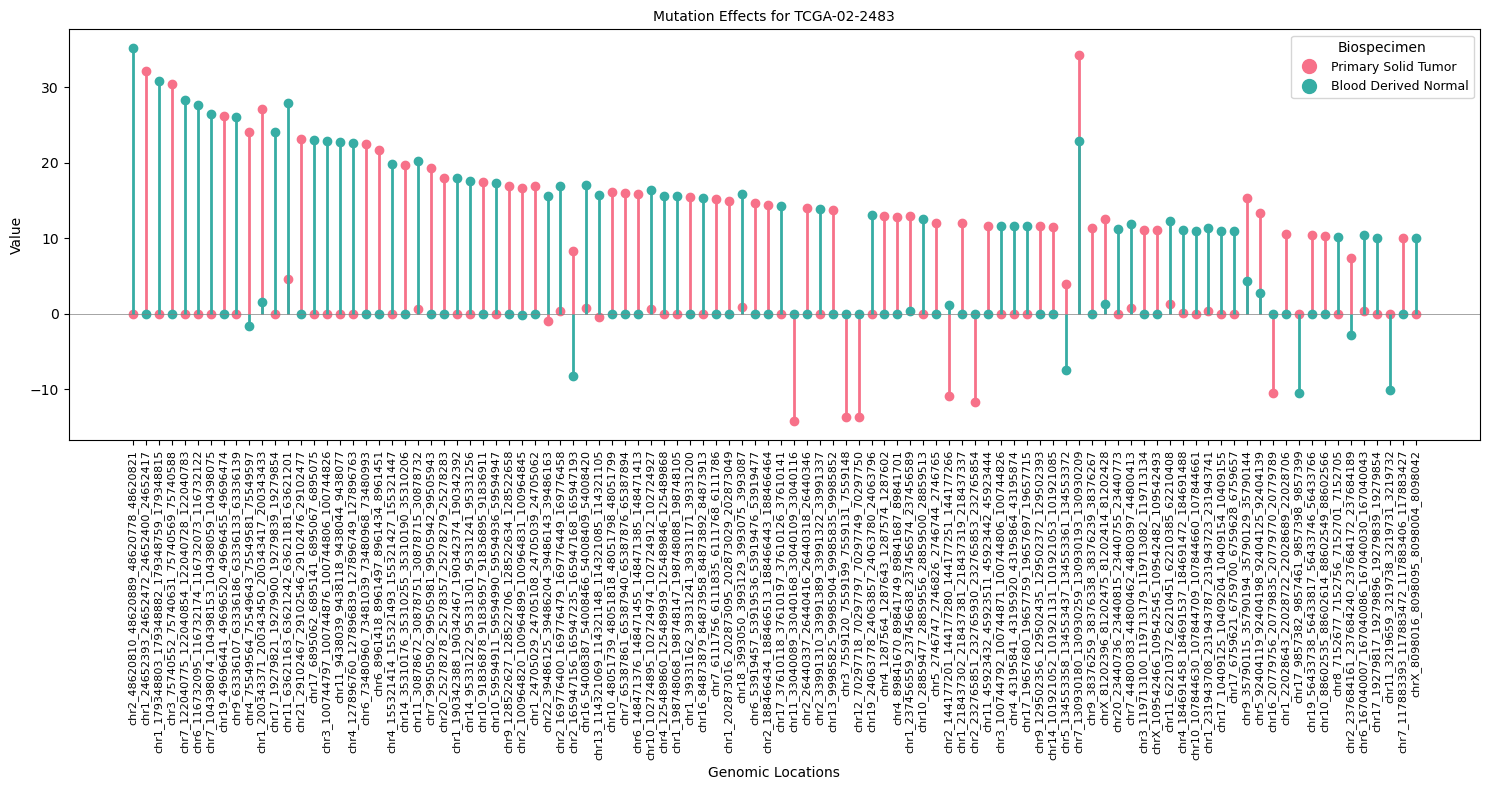

KeyboardInterrupt: Interrupted by user

In [9]:
# Iterate over each group to create a separate plot
for name, group in grouped:
    # Initialize the plot
    plt.figure(figsize=(15, 8))
    group = group.dropna(axis=1, how='all')
    
    # Replace NaN with 0 and ignore the first five non-numeric columns
    numeric_data = group.iloc[:, 6:].fillna(0)
    
    # Determine the number of instances
    num_instances = numeric_data.shape[0]

    # Sort the columns based on the specified criteria
    if num_instances == 2:
        # Calculate the absolute difference between the two instances
        differences = numeric_data.diff().iloc[-1].abs()
        top_columns = differences.nlargest(100).index
    else:
        # Calculate the variance and sort
        variances = numeric_data.var()
        top_columns = variances.nlargest(100).index
    
    # Select the top 50 columns based on the criteria
    selected_columns = numeric_data[top_columns]

    # Define a color palette based on the number of unique biospecimen types in the current group
    unique_biospecimens_in_group = group['biospecimen'].unique()
    palette = sns.color_palette('husl', n_colors=len(unique_biospecimens_in_group))
    color_map = {biospecimen: color for biospecimen, color in zip(unique_biospecimens_in_group, palette)}
    
    # Plot stems for each biospecimen type
    for biospecimen_type in unique_biospecimens_in_group:
        biospecimen_group = numeric_data[group['biospecimen'] == biospecimen_type]
        color = color_map[biospecimen_type]
        
        for column_idx, column_name in enumerate(selected_columns.columns):
            x_values = [column_idx] * len(biospecimen_group)
            y_values = biospecimen_group[column_name]

            # Plot the stems for the current biospecimen type with its color
            (markers, stemlines, baseline) = plt.stem(x_values, y_values, basefmt=" ", use_line_collection=True)
            plt.setp(stemlines, 'color', color, 'linewidth', 2)
            plt.setp(markers, 'color', color, 'markersize', 6)

    # Customize the plot
    plt.title(f'Mutation Effects for {name}', fontsize=10)
    plt.xticks(ticks=range(len(selected_columns.columns)), labels=selected_columns.columns, rotation=90, fontsize=8)
    plt.xlabel('Genomic Locations', fontsize=10)
    plt.ylabel('Value', fontsize=10)
    plt.axhline(0, color='gray', linewidth=0.5)

    # Create a legend for the current group
    handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=biospecimen)
               for biospecimen, color in color_map.items()]
    plt.legend(handles=handles, title='Biospecimen', fontsize=9, title_fontsize=10)

    plt.tight_layout()
    plt.show()
    input()

In [7]:
# Function to get indices of non-NaN values for each column
def get_non_nan_indices(df, col):
    return list(df[col].dropna().index)

In [ ]:
# Assuming you have a DataFrame named 'df'

# Calculate the maximum values for columns, starting from the third column, and sort them in descending order
column_max = df.iloc[:, 5:].max()
sorted_max = column_max.sort_values(ascending=False)

# Get the names of the top 15 columns
top_15_columns = sorted_max.index

# Count the number of non-NaN values in each of the top 15 columns
non_nan_counts = [df[col].notna().sum() for col in top_15_columns]

# Convert the Series of sorted max values to a DataFrame
top_15_df = sorted_max.reset_index()
top_15_df.columns = ['Column', 'Max Value']

# Add the non-NaN counts as a new column to the DataFrame
top_15_df['Non-NaN Count'] = non_nan_counts

# Function to get indices of non-NaN values for each column
def get_non_nan_indices(df, col):
    return list(df[col].dropna().index)

# Function to get TCGA_barcode of non-NaN values for each column
def get_non_nan_barcodes(df, col):
    return df[df[col].notna()]['TCGA_barcode'].tolist()

# Add a new column to top_15_df with the indices of non-NaN values for each column
top_15_df['Non-NaN Indices'] = top_15_df['Column'].apply(lambda col: get_non_nan_indices(df, col))

# Apply the modified function to the top 15 columns
top_15_df['Non-NaN TCGA_barcodes'] = top_15_df['Column'].apply(lambda col: get_non_nan_barcodes(df, col))

top_15_df

In [8]:
def variant_region_diff(row):
    parts = row.split('_')
    if len(parts) >= 4:
        start = int(parts[-2])
        end = int(parts[-1])
        return end - start
    return None

In [9]:
selected_df = top_15_df[top_15_df['Max Value']>5]
selected_df['Percentage'] = top_15_df['Non-NaN Count']/292 *100
selected_df

/tmp/ipykernel_811994/818947200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Percentage'] = top_15_df['Non-NaN Count']/292 *100


,Column,Max Value,Non-NaN Count,Non-NaN Indices,Percentage
0,chr18_42574752_42574831_42574758_42574779,38.590750,12,"[46, 57, 58, 69, 94, 104, 178, 185, 212, 230, ...",4.109589
1,chr3_42193783_42193862_42193787_42193805,38.371969,57,"[0, 4, 6, 11, 12, 13, 15, 27, 47, 52, 56, 60, ...",19.520548
2,chr14_88609226_88609305_88609247_88609257,38.145875,12,"[29, 126, 130, 139, 144, 185, 214, 227, 230, 2...",4.109589
3,chr4_28287772_28287851_28287797_28287809,38.086723,3,"[67, 249, 286]",1.027397
4,chr2_232531311_232531390_232531263_232531334,38.019559,22,"[0, 61, 62, 68, 74, 78, 79, 103, 107, 115, 124...",7.534247
...,...,...,...,...,...
6656,chr6_29828502_29828581_29828528_29828529,5.002682,193,"[0, 1, 2, 3, 6, 7, 10, 11, 13, 14, 15, 16, 17,...",66.095890
6657,chr19_35259199_35259278_35259204_35259205,5.002419,1,[44],0.342466
6658,chr11_48949198_48949277_48949214_48949229,5.001278,177,"[0, 3, 4, 6, 8, 9, 11, 12, 15, 17, 18, 19, 21,...",60.616438
6659,chr13_110492029_110492108_110492064_110492065,5.000697,22,"[43, 52, 53, 64, 66, 72, 98, 106, 115, 118, 13...",7.534247


In [10]:
selected_df['Variant Region Difference'] = selected_df['Column'].apply(variant_region_diff)
snp_df = selected_df[selected_df['Variant Region Difference'] <5]
snp_df

/tmp/ipykernel_811994/3928254558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Variant Region Difference'] = selected_df['Column'].apply(variant_region_diff)


,Column,Max Value,Non-NaN Count,Non-NaN Indices,Percentage,Variant Region Difference
16,chr16_58267438_58267517_58267455_58267458,36.161531,32,"[6, 7, 25, 32, 49, 63, 65, 80, 97, 115, 128, 1...",10.958904,3
19,chr10_73797336_73797415_73797341_73797342,35.699415,3,"[17, 219, 266]",1.027397,1
32,chr12_23190232_23190311_23190241_23190245,34.806988,4,"[26, 163, 196, 290]",1.369863,4
40,chr4_52750790_52750869_52750817_52750818,34.397403,2,"[76, 240]",0.684932,1
41,chr3_175460004_175460083_175460009_175460012,34.386584,2,"[122, 257]",0.684932,3
...,...,...,...,...,...,...
6654,chr1_209623686_209623765_209623748_209623749,5.003059,6,"[73, 108, 140, 156, 167, 206]",2.054795,1
6656,chr6_29828502_29828581_29828528_29828529,5.002682,193,"[0, 1, 2, 3, 6, 7, 10, 11, 13, 14, 15, 16, 17,...",66.095890,1
6657,chr19_35259199_35259278_35259204_35259205,5.002419,1,[44],0.342466,1
6659,chr13_110492029_110492108_110492064_110492065,5.000697,22,"[43, 52, 53, 64, 66, 72, 98, 106, 115, 118, 13...",7.534247,1


In [12]:
snp_df.to_csv("/data/projects/GDC_Cancer_Wise/Brain/Data/Postprocessing_result/Acceptor/important_snp.tsv", sep="\t", index=False)

In [11]:
bins = [0,1,2,3,4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 96, 97, 98, 99, 100]
patient_stats = pd.cut(snp_df['Percentage'], bins=bins).value_counts().sort_index()
patient_stats
## 3606 unique acceptor regions with mutations are present 0-5% of patients 

(0, 1]       1643
(1, 2]        480
(2, 3]        192
(3, 4]        110
(4, 5]         60
(5, 10]       203
(10, 15]      131
(15, 20]       90
(20, 25]       72
(25, 30]       59
(30, 35]       62
(35, 40]       59
(40, 45]       64
(45, 50]       60
(50, 55]       49
(55, 60]       43
(60, 65]       47
(65, 70]       50
(70, 75]       39
(75, 80]       34
(80, 85]       41
(85, 90]       57
(90, 95]       53
(95, 96]       15
(96, 97]       10
(97, 98]       13
(98, 99]       24
(99, 100]      25
Name: Percentage, dtype: int64

In [54]:
snp_df_0_5 = snp_df[(snp_df['Percentage']>0)&(snp_df['Percentage']<5)]
snp_df_0_5

,Column,Max Value,Non-NaN Count,Non-NaN Indices,Percentage,Variant Region Difference
19,chr10_73797336_73797415_73797341_73797342,35.699415,3,"[17, 219, 266]",1.027397,1
32,chr12_23190232_23190311_23190241_23190245,34.806988,4,"[26, 163, 196, 290]",1.369863,4
40,chr4_52750790_52750869_52750817_52750818,34.397403,2,"[76, 240]",0.684932,1
41,chr3_175460004_175460083_175460009_175460012,34.386584,2,"[122, 257]",0.684932,3
48,chr22_43990224_43990303_43990253_43990257,34.029755,2,"[93, 254]",0.684932,4
...,...,...,...,...,...,...
6651,chr15_57599578_57599657_57599643_57599644,5.004210,1,[161],0.342466,1
6653,chr12_120159984_120160063_120160002_120160003,5.003294,2,"[156, 206]",0.684932,1
6654,chr1_209623686_209623765_209623748_209623749,5.003059,6,"[73, 108, 140, 156, 167, 206]",2.054795,1
6657,chr19_35259199_35259278_35259204_35259205,5.002419,1,[44],0.342466,1


In [55]:
df_ref_score = pd.read_csv("/data/projects/GDC_Cancer_Wise/Brain/Data/DNABERT_result/Acceptor/df_ref_score.tsv", sep="\t")
df_alt_score = pd.read_csv("/data/projects/GDC_Cancer_Wise/Brain/Data/DNABERT_result/Acceptor/df_alt_score.tsv", sep="\t")

In [56]:
data = []
for index, row in snp_df_0_5.iterrows():
    first_non_nan_index = row['Non-NaN Indices'][0]
    if (df_ref_score[row['Column']][first_non_nan_index] >= 0.5) and (df_alt_score[row['Column']][first_non_nan_index] < 0.5):
        # Append the data to the list
        data.append({
            'Column': row['Column'],
            'Non-NaN Count': row['Non-NaN Count'],
            'Percentage': row['Percentage'],
            'Non-NaN Indices': row['Non-NaN Indices'],
            'Ref_Score': df_ref_score[row['Column']][first_non_nan_index],
            'Alt_Score': df_alt_score[row['Column']][first_non_nan_index]
        })

In [57]:
selected_df = pd.DataFrame(data)
selected_df

,Column,Non-NaN Count,Percentage,Non-NaN Indices,Ref_Score,Alt_Score
0,chr12_23190232_23190311_23190241_23190245,4,1.369863,"[26, 163, 196, 290]",0.999996,0.000008
1,chr4_52750790_52750869_52750817_52750818,2,0.684932,"[76, 240]",0.999974,0.000002
2,chr3_175460004_175460083_175460009_175460012,2,0.684932,"[122, 257]",0.999991,0.000005
3,chr22_43990224_43990303_43990253_43990257,2,0.684932,"[93, 254]",0.999997,0.000020
4,chr9_129285469_129285548_129285489_129285492,4,1.369863,"[20, 122, 143, 257]",0.999999,0.000051
...,...,...,...,...,...,...
824,chr12_95918937_95919016_95918965_95918966,1,0.342466,[96],0.944191,0.324227
825,chr2_104662704_104662783_104662724_104662725,2,0.684932,"[18, 195]",0.714249,0.068081
826,chr2_111151781_111151860_111151839_111151840,2,0.684932,"[156, 206]",0.732404,0.075777
827,chr14_102508510_102508589_102508546_102508547,8,2.739726,"[67, 91, 139, 150, 175, 189, 249, 270]",0.902581,0.221120


In [14]:
# Perform union
union_set = set()
for lst in selected_df['Non-NaN Indices']:
    union_set.update(lst)

In [15]:
union_list = list(union_set)

In [17]:
len(union_list)

292

In [58]:
selected_df.sort_values(by='Non-NaN Count', ascending=False).head(10)

,Column,Non-NaN Count,Percentage,Non-NaN Indices,Ref_Score,Alt_Score
700,chr17_36437943_36438022_36438004_36438005,14,4.794521,"[7, 32, 46, 47, 62, 78, 89, 103, 124, 125, 143...",0.970737,0.279019
257,chr13_112321071_112321150_112321111_112321112,14,4.794521,"[23, 28, 35, 43, 57, 66, 94, 127, 140, 158, 16...",0.991656,0.006550
162,chr6_131874227_131874306_131874253_131874254,14,4.794521,"[13, 68, 72, 79, 80, 89, 125, 139, 151, 164, 1...",0.896389,0.000046
146,chr12_40432337_40432416_40432351_40432352,14,4.794521,"[12, 70, 82, 160, 161, 189, 201, 212, 213, 225...",0.999875,0.027183
597,chr1_35460398_35460477_35460473_35460474,14,4.794521,"[7, 32, 34, 48, 75, 78, 83, 138, 140, 162, 177...",0.854789,0.029385
440,chr11_102950188_102950267_102950235_102950236,14,4.794521,"[13, 45, 50, 61, 115, 185, 186, 210, 217, 230,...",0.977180,0.035415
630,chr22_26650192_26650271_26650215_26650216,14,4.794521,"[3, 24, 73, 74, 108, 114, 130, 135, 148, 167, ...",0.956683,0.136917
500,chr2_55315222_55315301_55315294_55315295,14,4.794521,"[12, 19, 29, 44, 68, 79, 80, 156, 164, 206, 22...",0.973460,0.057262
532,chr2_164527096_164527175_164527150_164527151,13,4.452055,"[16, 28, 106, 127, 138, 153, 177, 219, 228, 25...",0.970760,0.072912
470,chr18_29530559_29530638_29530631_29530632,13,4.452055,"[16, 84, 87, 88, 115, 146, 158, 212, 223, 258,...",0.994634,0.175897


In [59]:
with open("/data/projects/GDC_Cancer_Wise/Brain/Data/Sequence_generation/raw_acceptor_vcf_data.pkl", 'rb') as f:
        acceptor_pickle = pickle.load(f)

In [88]:
data_attn= []
for index, row in selected_df.iterrows():
    #print(row)
    target_values = row['Column'].split('_')
    # Convert numerical parts to integers
    target_values[1:] = [int(v) for v in target_values[1:]]
    
    
    patient_indices = row['Non-NaN Indices']
    for patient_index in patient_indices:
        patient_id=df['File_ID'][patient_index]
        patient_df = acceptor_pickle[df['File_ID'][patient_index]]
        selected_rows = patient_df[
            (patient_df['chr'] == target_values[0]) &
            (patient_df['Acceptor_start'] == target_values[1]) & 
            (patient_df['Acceptor_end'] == target_values[2]) & 
            (patient_df['varinat_start'] == target_values[3]) & 
            (patient_df['variant_end'] == target_values[4])
        ]
        new_selected_rows = selected_rows.copy()
        new_selected_rows['Ref_Score'] = row['Ref_Score']
        new_selected_rows['Alt_Score'] = row['Alt_Score']
        new_selected_rows.insert(0, 'patient_id', patient_id)

        data_attn.extend(new_selected_rows.to_dict('records'))
    #input()

In [89]:
df_attn = pd.DataFrame(data_attn)
df_attn =df_attn .drop(columns='index')
df_attn

,patient_id,chr,strand,Transcript_ID,Acceptor_start,Acceptor_end,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_Score,Alt_Score
0,cf245938-dd0c-42fe-9a39-09f29ff12f23,chr12,+,ENST00000545400.1,23190232,23190311,23190241,23190245,TAAA,TA,GCAAATCAGTAAAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTA...,GCAAATCAGTAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTAAC...,0.999996,0.000008
1,0bce913f-c4a0-4cc6-9a8b-a223f00cba11,chr12,+,ENST00000545400.1,23190232,23190311,23190241,23190245,TAAA,TA,GCAAATCAGTAAAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTA...,GCAAATCAGTAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTAAC...,0.999996,0.000008
2,ef52238c-1fb1-4ba7-a943-76e849f8145f,chr12,+,ENST00000545400.1,23190232,23190311,23190241,23190245,TAAA,TA,GCAAATCAGTAAAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTA...,GCAAATCAGTAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTAAC...,0.999996,0.000008
3,50014300-ff2e-49f6-857d-dd3e1f22a588,chr12,+,ENST00000545400.1,23190232,23190311,23190241,23190245,TAAA,TA,GCAAATCAGTAAAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTA...,GCAAATCAGTAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTAAC...,0.999996,0.000008
4,65723119-bdfe-46f0-b629-c171023abd71,chr4,-,ENST00000440542.1,52750790,52750869,52750817,52750818,T,TGAATAG,CGTGAGGGAAAGGTTCAGAGCACAGCCTCTATTGCCTTCCTGTTAA...,CGTGAGGGAAAGGTTCAGAGCACAGCCTGAATAGCTATTGCCTTCC...,0.999974,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,2fdab641-d73b-4f9a-aa4c-c1944f131a69,chr14,-,"ENST00000286918.9, ENST00000557902.1, ENST0000...",102508510,102508589,102508546,102508547,T,C,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTTATCTGTAAG...,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTCATCTGTAAG...,0.902581,0.221120
2432,45ec553b-1e7a-4b3c-86a1-c3f1547c1b43,chr14,-,"ENST00000286918.9, ENST00000557902.1, ENST0000...",102508510,102508589,102508546,102508547,T,C,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTTATCTGTAAG...,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTCATCTGTAAG...,0.902581,0.221120
2433,25bee010-cc99-4af0-ba2f-fe4dd308be33,chr14,-,"ENST00000286918.9, ENST00000557902.1, ENST0000...",102508510,102508589,102508546,102508547,T,C,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTTATCTGTAAG...,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTCATCTGTAAG...,0.902581,0.221120
2434,c71f8c39-653f-42f2-ad3e-439cf86a0738,chr14,-,"ENST00000286918.9, ENST00000557902.1, ENST0000...",102508510,102508589,102508546,102508547,T,C,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTTATCTGTAAG...,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTCATCTGTAAG...,0.902581,0.221120


In [90]:
filtered_df = df_attn[(df_attn['ref_neucleotide'].str.len() <=5) & (df_attn['alternative_neucleotide'].str.len() <=5)]
filtered_df

,patient_id,chr,strand,Transcript_ID,Acceptor_start,Acceptor_end,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_Score,Alt_Score
0,cf245938-dd0c-42fe-9a39-09f29ff12f23,chr12,+,ENST00000545400.1,23190232,23190311,23190241,23190245,TAAA,TA,GCAAATCAGTAAAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTA...,GCAAATCAGTAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTAAC...,0.999996,0.000008
1,0bce913f-c4a0-4cc6-9a8b-a223f00cba11,chr12,+,ENST00000545400.1,23190232,23190311,23190241,23190245,TAAA,TA,GCAAATCAGTAAAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTA...,GCAAATCAGTAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTAAC...,0.999996,0.000008
2,ef52238c-1fb1-4ba7-a943-76e849f8145f,chr12,+,ENST00000545400.1,23190232,23190311,23190241,23190245,TAAA,TA,GCAAATCAGTAAAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTA...,GCAAATCAGTAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTAAC...,0.999996,0.000008
3,50014300-ff2e-49f6-857d-dd3e1f22a588,chr12,+,ENST00000545400.1,23190232,23190311,23190241,23190245,TAAA,TA,GCAAATCAGTAAAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTA...,GCAAATCAGTAGAGTTTCCATTGATGGTTCTTTTGCAGACTCTAAC...,0.999996,0.000008
6,5fd77ba9-5015-4d8b-86a0-582e5c76bdd6,chr3,+,ENST00000414826.1,175460004,175460083,175460009,175460012,CAT,C,TTTCACATGTTTATGTTGTTTTCTGTTATTGCTATTACAGATTATA...,TTTCACGTTTATGTTGTTTTCTGTTATTGCTATTACAGATTATACT...,0.999991,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,2fdab641-d73b-4f9a-aa4c-c1944f131a69,chr14,-,"ENST00000286918.9, ENST00000557902.1, ENST0000...",102508510,102508589,102508546,102508547,T,C,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTTATCTGTAAG...,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTCATCTGTAAG...,0.902581,0.221120
2432,45ec553b-1e7a-4b3c-86a1-c3f1547c1b43,chr14,-,"ENST00000286918.9, ENST00000557902.1, ENST0000...",102508510,102508589,102508546,102508547,T,C,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTTATCTGTAAG...,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTCATCTGTAAG...,0.902581,0.221120
2433,25bee010-cc99-4af0-ba2f-fe4dd308be33,chr14,-,"ENST00000286918.9, ENST00000557902.1, ENST0000...",102508510,102508589,102508546,102508547,T,C,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTTATCTGTAAG...,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTCATCTGTAAG...,0.902581,0.221120
2434,c71f8c39-653f-42f2-ad3e-439cf86a0738,chr14,-,"ENST00000286918.9, ENST00000557902.1, ENST0000...",102508510,102508589,102508546,102508547,T,C,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTTATCTGTAAG...,GTGGGTATATCACAGTCCCTGGCCGAGCCTCAGCTTCATCTGTAAG...,0.902581,0.221120


In [91]:
filtered_df[filtered_df['Acceptor_start']==1925899]

,patient_id,chr,strand,Transcript_ID,Acceptor_start,Acceptor_end,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_Score,Alt_Score
1412,bbcc5f2c-08f5-424d-8a66-099084f3c47e,chr1,-,"ENST00000412120.2, ENST00000464311.5, ENST0000...",1925899,1925978,1925923,1925924,C,T,CGTGCCTCTCTTGGTGATGATGTCCAGTGTTTCTTGAGCCTAAAGA...,CGTGCCTCTCTTGGTGATGATGTCTAGTGTTTCTTGAGCCTAAAGA...,0.995879,0.255925
1413,706fe100-2e22-4ce8-8730-6515c2db7ace,chr1,-,"ENST00000412120.2, ENST00000464311.5, ENST0000...",1925899,1925978,1925923,1925924,C,T,CGTGCCTCTCTTGGTGATGATGTCCAGTGTTTCTTGAGCCTAAAGA...,CGTGCCTCTCTTGGTGATGATGTCTAGTGTTTCTTGAGCCTAAAGA...,0.995879,0.255925


In [92]:
# Group by all columns except 'patient_id' and aggregate 'patient_id' into a list
grouped_df = filtered_df.groupby(
    filtered_df.columns.drop('patient_id').tolist()
).agg({'patient_id': list}).reset_index()

grouped_df

,chr,strand,Transcript_ID,Acceptor_start,Acceptor_end,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_Score,Alt_Score,patient_id
0,chr1,+,"ENST00000246151.9, ENST00000374524.1, ENST0000...",23786274,23786353,23786322,23786323,G,A,ATAATTCATACCTTCTTTCCCTATTCCTGTCATCCTCTAGAATTTC...,ATAATTCATACCTTCTTTCCCTATTCCTGTCATCCTCTAGAATTTC...,0.700227,0.032903,"[6fee80f8-11cb-4de7-aded-e586708d2368, f98de26..."
1,chr1,+,"ENST00000261464.10, ENST00000336184.6, ENST000...",211371261,211371340,211371265,211371266,A,G,ACTAATTTTTTAAACATGATTATCCATTTTGTAATGAAAGGTTTTT...,ACTAGTTTTTTAAACATGATTATCCATTTTGTAATGAAAGGTTTTT...,0.980296,0.004916,"[e849abef-b55e-4124-b760-09101a7c4390, b020b62..."
2,chr1,+,ENST00000271588.9,186078066,186078145,186078129,186078130,C,T,TAAGATTAGAGGAGTAAACATAGTGGGATATTATTTTCAGGAGGGC...,TAAGATTAGAGGAGTAAACATAGTGGGATATTATTTTCAGGAGGGC...,0.992662,0.020286,"[0332b017-17d5-4083-8fc4-9d6f8fdbbbde, 8faa4b6..."
3,chr1,+,"ENST00000292357.8, ENST00000338302.7, ENST0000...",156912729,156912808,156912797,156912798,G,A,GCCAAGATGCCATTCTGAGTGAGCACCCCATTCCACACAGGAATCC...,GCCAAGATGCCATTCTGAGTGAGCACCCCATTCCACACAGGAATCC...,0.974504,0.078847,"[5fd77ba9-5015-4d8b-86a0-582e5c76bdd6, 54c65bd..."
4,chr1,+,ENST00000294428.7,64804693,64804772,64804703,64804707,TAAA,TAA,TTTTCAAAATTAAACTGACAACGTTTTGTCATTTTCACAGAGCTCA...,TTTTCAAAATTAACTGACAACGTTTTGTCATTTTCACAGAGCTCAG...,0.999974,0.064063,"[d85192d7-683f-4214-b8de-ae2e4ff2405c, 25bee01..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,chrX,-,ENST00000438499.1,6668090,6668169,6668146,6668147,G,T,GATTCTCCTCCAATGCATCACATTTTTATTCCCCTGTCCCTGTGGG...,GATTCTCCTCCAATGCATCACATTTTTATTCCCCTGTCCCTGTGGG...,0.741388,0.010471,"[e7b36f2d-9ab1-4a46-b669-65367b841752, c087084..."
822,chrX,-,ENST00000480178.1,9748034,9748113,9748044,9748045,T,G,AGGAAATGCTTGAGACAGTTCCAGCGGCCACATCTCCCTCTGTGTG...,AGGAAATGCTGGAGACAGTTCCAGCGGCCACATCTCCCTCTGTGTG...,0.636375,0.043710,"[cf245938-dd0c-42fe-9a39-09f29ff12f23, 0bce913..."
823,chrX,-,ENST00000494525.1,21733718,21733797,21733771,21733772,G,A,TCCTCTTCAATTCTTTGATATCACTGAGTTCTTTTACCACTGGAAA...,TCCTCTTCAATTCTTTGATATCACTGAGTTCTTTTACCACTGGAAA...,0.702985,0.007422,[41d50a3c-49fc-4d8a-9c25-bbbcd3a5da6f]
824,chrX,-,ENST00000624824.1,15702688,15702767,15702716,15702717,A,G,TGGCACACGGCGCCTTGTGCACTTTCCAACATTTTGATGCTAACCG...,TGGCACACGGCGCCTTGTGCACTTTCCAGCATTTTGATGCTAACCG...,0.939159,0.000969,"[0332b017-17d5-4083-8fc4-9d6f8fdbbbde, 8faa4b6..."


In [93]:
def seq2kmer(seq):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space
    """
    k=6
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

In [95]:
merged_list = list(zip(grouped_df['reference_seq'], grouped_df['alt_seq']))
merged_list = [item.upper() for tup in merged_list for item in tup]
#print(merged_list)
kmer_lst = list(map(seq2kmer, merged_list))
df_kmer = pd.DataFrame(kmer_lst, columns=['Sequence'])
df_kmer['Label'] = np.random.choice([0, 1], size=len(df_kmer))
df_kmer

,Sequence,Label
0,ATAATT TAATTC AATTCA ATTCAT TTCATA TCATAC CATA...,1
1,ATAATT TAATTC AATTCA ATTCAT TTCATA TCATAC CATA...,1
2,ACTAAT CTAATT TAATTT AATTTT ATTTTT TTTTTT TTTT...,0
3,ACTAGT CTAGTT TAGTTT AGTTTT GTTTTT TTTTTT TTTT...,0
4,TAAGAT AAGATT AGATTA GATTAG ATTAGA TTAGAG TAGA...,1
...,...,...
1647,TCCTCT CCTCTT CTCTTC TCTTCA CTTCAA TTCAAT TCAA...,1
1648,TGGCAC GGCACA GCACAC CACACG ACACGG CACGGC ACGG...,0
1649,TGGCAC GGCACA GCACAC CACACG ACACGG CACGGC ACGG...,1
1650,CTGGTC TGGTCC GGTCCG GTCCGA TCCGAG CCGAGT CGAG...,0


In [96]:
df_kmer.to_csv("/data/projects/GDC_Cancer_Wise/Brain/Data/Visualization_data/Acceptor/dev.tsv", sep="\t", index=False)

In [35]:
pred_numpy_load= np.load("/data/private/pdutta/DNABERT_data/Genetic_variant/Brain/Acceptor/65723119-bdfe-46f0-b629-c171023abd71/Prediction_result/pred_results.npy")

In [36]:
pred_numpy_load

array([4.3456817e-05, 5.0468840e-05, 1.3360610e-06, ..., 3.9531137e-03,
       3.2357029e-06, 3.8750277e-06], dtype=float32)

In [17]:
# Convert the dictionary to a list of tuples
data_items = list(mapping.items())

# Create a DataFrame from the list of tuples
df_mapping = pd.DataFrame(data_items, columns=['Filename', 'Patient_ID'])
df_mapping

,Filename,Patient_ID
0,96ef40c3-8d4c-4fe1-a33a-99f5b205a0bb,8a5741e3-ade9-4aa0-bf16-fda229785973
1,6050f994-f394-4c1c-93ce-d36733aa9ae9,92d4df10-dc24-495c-889f-98fe42259a3d
2,7cae6c0b-36fe-411b-bbba-093a4c846d84,31261c79-49e6-4e8e-9135-7445a93d3ff6
3,e8114ae7-e076-44ca-b2bb-b6c3629b53b0,03ec9184-c32b-40ec-90f6-fcb9ac13897c
4,b73cfd2e-044f-4b41-b404-080d9d18e61d,8b174bed-2bd0-4318-8831-8676df9af5a0
...,...,...
287,5844876a-d390-4c02-acb9-f32647ca7375,b53ad5a6-36a2-455a-8769-897c0adfb500
288,45ec553b-1e7a-4b3c-86a1-c3f1547c1b43,87113bda-e063-4f2c-9ac2-5f02a05d3a9c
289,8f524ded-7ae8-44cd-8e62-5db87178452c,4d278e32-a900-4d28-87be-575ca498db24
290,3ef3e4f1-9b47-4f11-9024-85242ecee397,6788564d-7cfb-4bc2-a6e1-010337a37210


In [18]:
row_nan_percentage = df.isna().mean(axis=1) * 100
row_nan_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
row_nan_stats = pd.cut(row_nan_percentage, bins=row_nan_bins).value_counts().sort_index()

In [19]:
column_nan_percentage = df.isna().mean() * 100
column_nan_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
column_nan_stats = pd.cut(column_nan_percentage, bins=column_nan_bins).value_counts().sort_index()

In [20]:
row_nan_stats

(0, 10]        0
(10, 20]       0
(20, 30]       0
(30, 40]       0
(40, 50]       0
(50, 60]       0
(60, 70]       0
(70, 80]       4
(80, 90]     287
(90, 100]      1
dtype: int64

In [21]:
column_nan_stats

(0, 10]       4225
(10, 20]      3076
(20, 30]      2963
(30, 40]      3179
(40, 50]      3525
(50, 60]      3837
(60, 70]      4291
(70, 80]      5131
(80, 90]      7567
(90, 100]    86945
dtype: int64

In [22]:
# Find the 10 columns with the fewest NaN percentages
columns_with_least_nans = column_nan_percentage.nsmallest(10)

# Print the 10 columns with the fewest NaN values along with their NaN percentages
print("Columns with the fewest NaN values:")
for col_name, nan_percentage in columns_with_least_nans.iteritems():
    print(f"Column: {col_name}, NaN percentage: {nan_percentage:.2f}%")
    
    # Print the column values
    #print(df[col_name])
    #print()

Columns with the fewest NaN values:
Column: Patient_ID, NaN percentage: 0.00%
Column: File_ID, NaN percentage: 0.00%
Column: chr1_948193_948272_948244_948245, NaN percentage: 0.00%
Column: chr1_3891018_3891097_3891028_3891029, NaN percentage: 0.00%
Column: chr1_11127767_11127846_11127835_11127836, NaN percentage: 0.00%
Column: chr1_11767180_11767259_11767246_11767247, NaN percentage: 0.00%
Column: chr1_11824445_11824524_11824497_11824498, NaN percentage: 0.00%
Column: chr1_15487244_15487323_15487255_15487256, NaN percentage: 0.00%
Column: chr1_26553350_26553429_26553428_26553429, NaN percentage: 0.00%
Column: chr1_31415832_31415911_31415832_31415833, NaN percentage: 0.00%


/tmp/ipykernel_3577205/3261551515.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, nan_percentage in columns_with_least_nans.iteritems():


In [23]:
# Get the column names with 0% NaN values
cols_with_no_nans = column_nan_percentage[column_nan_percentage == 0].index

# Create a new dataframe with only the columns that have 0% NaN values
df_no_nans = df[cols_with_no_nans]

df_no_nans

,Patient_ID,File_ID,chr1_948193_948272_948244_948245,chr1_3891018_3891097_3891028_3891029,chr1_11127767_11127846_11127835_11127836,chr1_11767180_11767259_11767246_11767247,chr1_11824445_11824524_11824497_11824498,chr1_15487244_15487323_15487255_15487256,chr1_26553350_26553429_26553428_26553429,chr1_31415832_31415911_31415832_31415833,...,chr8_144355639_144355718_144355664_144355665,chr9_8958681_8958760_8958700_8958701,chr9_68542337_68542416_68542393_68542394,chr9_124874934_124875013_124874935_124874936,chr9_127732652_127732731_127732677_127732678,chr9_128107219_128107298_128107219_128107220,chr9_129098611_129098690_129098621_129098622,chr9_129513378_129513457_129513443_129513444,chr9_135590750_135590829_135590778_135590779,chr9_137463492_137463571_137463519_137463520
0,bf38f001-f1df-40da-9361-dc63efda3af3,722d3df5-7254-44f0-bbe0-cf39dbd57866,-0.927068,2.458144,-2.485881,-0.544322,1.236183,-0.106916,-0.125531,0.0,...,-0.590813,-0.001778,-0.449118,-0.09311,3.58703,-0.14439,5.869999,-0.341038,-0.125531,-0.114871
1,bcad998a-3311-4086-b490-d9119e54e6de,ddd29528-58ad-461f-8509-4e42f71b49fb,-0.927068,2.458144,-2.485881,-0.544322,1.236183,-0.106916,-0.125531,0.0,...,-0.590807,-0.001778,-0.449118,-0.09311,3.58703,-0.14439,5.870013,-0.341038,-0.125531,-0.114876
2,a00d6f63-c1b7-4fa1-852c-4a2b00d8a720,9593d4de-0dab-4d1e-b86c-af91cac938e6,-0.927068,2.458144,-2.485881,-0.544322,1.236183,-0.106916,-0.125531,0.0,...,-0.590811,-0.001778,-0.444202,-0.09311,3.58703,-0.14439,5.869999,-0.341038,-0.125531,-0.114871
3,52460ce7-4dd9-4aaf-9f2e-2395760f7026,e849abef-b55e-4124-b760-09101a7c4390,-0.927068,2.458144,-2.485881,-0.544322,1.236183,-0.106916,-0.125531,0.0,...,-0.590811,-0.001778,-0.444202,-0.09311,3.58703,-0.14439,5.870013,-0.341038,-0.125531,-0.114878
4,1bd09c3b-01e3-48b7-89d0-05352b6797ff,0c700657-b0b8-4361-9f89-b89a6c7b262d,-0.927068,2.458144,-2.485881,-0.544322,1.236183,-0.106916,-0.125531,0.0,...,-0.590810,-0.001778,-0.444202,-0.09311,3.58703,-0.14439,5.869999,-0.341038,-0.125531,-0.114869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,ed028565-6aec-4055-9db3-a153b1afbb1e,07dde76e-e126-4d66-ba85-059f076b7d04,-0.927068,2.458144,-2.485881,-0.544322,1.236183,-0.106916,-0.125531,0.0,...,-0.590811,-0.001778,-0.444202,-0.09311,3.58703,-0.14439,5.869999,-0.341038,-0.125531,-0.114871
288,69748f20-4d45-43c0-85d5-cae230582f7d,6f920119-c9ad-4ebf-bbc8-7724feae7b7b,-0.927068,2.458144,-2.485881,-0.544322,1.236183,-0.106916,-0.125531,0.0,...,-0.590811,-0.001778,-0.444202,-0.09311,3.58703,-0.14439,5.870013,-0.341038,-0.125531,-0.114878
289,73091777-795c-4761-aa95-1cc079e26b47,0105bc7d-a1cd-44d1-b533-b47a9781c0a5,-0.927068,2.458144,-2.485881,-0.544322,1.236183,-0.106916,-0.125531,0.0,...,-0.590810,-0.001778,-0.444202,-0.09311,3.58703,-0.14439,5.869999,-0.341038,-0.125531,-0.114869
290,553afc03-a17d-46ab-b0e5-0959c4f91a24,50014300-ff2e-49f6-857d-dd3e1f22a588,-0.927068,2.458144,-2.485881,-0.544322,1.236183,-0.106916,-0.125531,0.0,...,-0.590811,-0.001778,-0.444202,-0.09311,3.58703,-0.14439,5.869999,-0.341038,-0.125531,-0.114871


In [36]:
df_no_nans.max()

Patient_ID                                      fee72a44-3808-4e5f-bc63-5c6fef56db4c
File_ID                                         feee6c8a-5011-4b94-8af6-5525449fac12
chr1_948193_948272_948244_948245                                           -0.927068
chr1_3891018_3891097_3891028_3891029                                        2.458144
chr1_11127767_11127846_11127835_11127836                                   -2.485881
                                                                ...                 
chr9_128107219_128107298_128107219_128107220                                -0.14439
chr9_129098611_129098690_129098621_129098622                                5.870023
chr9_129513378_129513457_129513443_129513444                               -0.341038
chr9_135590750_135590829_135590778_135590779                               -0.125531
chr9_137463492_137463571_137463519_137463520                               -0.114867
Length: 165, dtype: object

In [26]:
df_no_nans.to_csv("/data/projects/GDC_Cancer_Wise/Brain/Data/Postprocessing_result/Acceptor/df_log_odd_score_non_NAN.tsv", sep="\t", index=False)

In [27]:
pd.set_option('display.max_columns', None)
df_clinical = pd.read_csv("/data/projects/GDC_Cancer_Wise/Brain/Clinical_files/LGG_clinical/clinical.tsv", sep="\t")
df_clinical = df_clinical[~(df_clinical.iloc[:, 3:] == "'--").all(axis=1)]
df_clinical

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,ethnicity,gender,occupation_duration_years,premature_at_birth,race,vital_status,weeks_gestation_at_birth,year_of_birth,year_of_death,adrenal_hormone,age_at_diagnosis,ajcc_clinical_m,ajcc_clinical_n,ajcc_clinical_stage,ajcc_clinical_t,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,anaplasia_present,anaplasia_present_type,ann_arbor_b_symptoms,ann_arbor_b_symptoms_described,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,ann_arbor_pathologic_stage,best_overall_response,breslow_thickness,burkitt_lymphoma_clinical_variant,child_pugh_classification,circumferential_resection_margin,classification_of_tumor,cog_liver_stage,cog_neuroblastoma_risk_group,cog_renal_stage,cog_rhabdomyosarcoma_risk_group,days_to_best_overall_response,days_to_diagnosis,days_to_last_follow_up,days_to_last_known_disease_status,days_to_recurrence,eln_risk_classification,enneking_msts_grade,enneking_msts_metastasis,enneking_msts_stage,enneking_msts_tumor_site,esophageal_columnar_dysplasia_degree,esophageal_columnar_metaplasia_present,figo_stage,figo_staging_edition_year,first_symptom_prior_to_diagnosis,gastric_esophageal_junction_involvement,gleason_grade_group,gleason_grade_tertiary,gleason_patterns_percent,goblet_cells_columnar_mucosa_present,greatest_tumor_dimension,gross_tumor_weight,icd_10_code,igcccg_stage,inpc_grade,inpc_histologic_group,inrg_stage,inss_stage,international_prognostic_index,irs_group,irs_stage,ishak_fibrosis_score,iss_stage,largest_extrapelvic_peritoneal_focus,last_known_disease_status,laterality,lymph_node_involved_site,lymph_nodes_positive,lymph_nodes_tested,lymphatic_invasion_present,margin_distance,margins_involved_site,masaoka_stage,medulloblastoma_molecular_classification,metastasis_at_diagnosis,metastasis_at_diagnosis_site,method_of_diagnosis,micropapillary_features,mitosis_karyorrhexis_index,mitotic_count,morphology,non_nodal_regional_disease,non_nodal_tumor_deposits,ovarian_specimen_status,ovarian_surface_involvement,papillary_renal_cell_type,percent_tumor_invasion,perineural_invasion_present,peripancreatic_lymph_nodes_positive,peripancreatic_lymph_nodes_tested,peritoneal_fluid_cytological_status,pregnant_at_diagnosis,primary_diagnosis,primary_disease,primary_gleason_grade,prior_malignancy,prior_treatment,progression_or_recurrence,residual_disease,satellite_nodule_present,secondary_gleason_grade,site_of_resection_or_biopsy,sites_of_involvement,supratentorial_localization,synchronous_malignancy,tissue_or_organ_of_origin,transglottic_extension,tumor_confined_to_organ_of_origin,tumor_depth,tumor_focality,tumor_grade,tumor_largest_dimension_diameter,tumor_regression_grade,tumor_stage,vascular_invasion_present,vascular_invasion_type,weiss_assessment_score,who_cns_grade,who_nte_grade,wilms_tumor_histologic_subtype,year_of_diagnosis,chemo_concurrent_to_radiation,days_to_treatment_end,days_to_treatment_start,initial_disease_status,number_of_cycles,reason_treatment_ended,regimen_or_line_of_therapy,route_of_administration,therapeutic_agents,treatment_anatomic_site,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,001ad307-4ad3-4f1d-b2fc-efc032871c7e,TCGA-HT-A614,TCGA-LGG,47,'--,'--,'--,'--,-17392,'--,not hispanic or latino,male,'--,'--,white,Alive,'--,1966,'--,'--,17392,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,not reported,'--,'--,'--,'--,'--,0,82,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,C71.0,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,not reported,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,9382/3,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--,Mixed glioma,'--,'--,no,No,not repor

In [29]:
valid_cols = df_clinical.columns[~(df_clinical == "'--").all()]
df_clinical = df_clinical[valid_cols]
df_clinical

,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,classification_of_tumor,days_to_diagnosis,days_to_last_follow_up,icd_10_code,last_known_disease_status,morphology,primary_diagnosis,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,001ad307-4ad3-4f1d-b2fc-efc032871c7e,TCGA-HT-A614,TCGA-LGG,47,-17392,'--,not hispanic or latino,male,white,Alive,1966,'--,17392,not reported,0,82,C71.0,not reported,9382/3,Mixed glioma,no,No,not reported,Cerebrum,No,Cerebrum,not reported,2013,not reported,"Pharmaceutical Therapy, NOS"
1,001ad307-4ad3-4f1d-b2fc-efc032871c7e,TCGA-HT-A614,TCGA-LGG,47,-17392,'--,not hispanic or latino,male,white,Alive,1966,'--,17392,not reported,0,82,C71.0,not reported,9382/3,Mixed glioma,no,No,not reported,Cerebrum,No,Cerebrum,not reported,2013,not reported,"Radiation Therapy, NOS"
2,0061e9ef-df6a-414e-af64-c88f8192e2d3,TCGA-E1-5311,TCGA-LGG,31,-11332,4084,not hispanic or latino,male,white,Dead,1963,2005,11332,not reported,0,'--,C71.9,not reported,9451/3,"Oligodendroglioma, anaplastic",no,No,not reported,"Brain, NOS",No,"Brain, NOS",not reported,1994,yes,"Radiation Therapy, NOS"
3,0061e9ef-df6a-414e-af64-c88f8192e2d3,TCGA-E1-5311,TCGA-LGG,31,-11332,4084,not hispanic or latino,male,white,Dead,1963,2005,11332,not reported,0,'--,C71.9,not reported,9451/3,"Oligodendroglioma, anaplastic",no,No,not reported,"Brain, NOS",No,"Brain, NOS",not reported,1994,yes,"Pharmaceutical Therapy, NOS"
4,0073a136-d5f4-4fd6-88f9-711768f2abc6,TCGA-VM-A8CF,TCGA-LGG,44,-16334,'--,not reported,female,white,Alive,1969,'--,16334,not reported,0,609,C71.0,not reported,9401/3,"Astrocytoma, anaplastic",no,No,not reported,Cerebrum,No,Cerebrum,not reported,2013,yes,"Radiation Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,fee2114e-f723-4374-91f8-f1dcc6b3eaee,TCGA-HT-7470,TCGA-LGG,37,-13611,1220,not hispanic or latino,male,white,Dead,1974,'--,13611,not reported,0,268,C71.9,not reported,9451/3,"Oligodendroglioma, anaplastic",no,No,not reported,"Brain, NOS",No,"Brain, NOS",not reported,2011,yes,"Pharmaceutical Therapy, NOS"
1027,ffcec8e5-9fd3-4b42-a7cb-74761f713cf4,TCGA-HT-7606,TCGA-LGG,30,-11233,'--,not hispanic or latino,female,white,Alive,1978,'--,11233,not reported,0,526,C71.9,not reported,9400/3,"Astrocytoma, NOS",no,No,not reported,"Brain, NOS",No,"Brain, NOS",not reported,2008,yes,"Pharmaceutical Therapy, NOS"
1028,ffcec8e5-9fd3-4b42-a7cb-74761f713cf4,TCGA-HT-7606,TCGA-LGG,30,-11233,'--,not hispanic or latino,female,white,Alive,1978,'--,11233,not reported,0,526,C71.9,not reported,9400/3,"Astrocytoma, NOS",no,No,not reported,"Brain, NOS",No,"Brain, NOS",not reported,2008,yes,"Radiation Therapy, NOS"
1029,fff304a2-113f-499d-a88c-9d3660c348d9,TCGA-RY-A847,TCGA-LGG,45,-16732,'--,not hispanic or latino,male,white,Alive,1967,'--,16732,not reported,0,933,C71.0,not reported,9450/3,"Oligodendroglioma, NOS",no,No,not reported,Cerebrum,No,Cerebrum,not reported,2012,no,"Radiation Therapy, NOS"


In [30]:
def concatenate_unique(series):
    unique_values = series.dropna().unique()
    return '; '.join(unique_values)

In [31]:
unique_df_clinical = df_clinical.groupby('case_id').agg(concatenate_unique).reset_index()
unique_df_clinical

,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,classification_of_tumor,days_to_diagnosis,days_to_last_follow_up,icd_10_code,last_known_disease_status,morphology,primary_diagnosis,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,001ad307-4ad3-4f1d-b2fc-efc032871c7e,TCGA-HT-A614,TCGA-LGG,47,-17392,'--,not hispanic or latino,male,white,Alive,1966,'--,17392,not reported,0,82,C71.0,not reported,9382/3,Mixed glioma,no,No,not reported,Cerebrum,No,Cerebrum,not reported,2013,not reported,"Pharmaceutical Therapy, NOS; Radiation Therapy..."
1,0061e9ef-df6a-414e-af64-c88f8192e2d3,TCGA-E1-5311,TCGA-LGG,31,-11332,4084,not hispanic or latino,male,white,Dead,1963,2005,11332,not reported,0,'--,C71.9,not reported,9451/3,"Oligodendroglioma, anaplastic",no,No,not reported,"Brain, NOS",No,"Brain, NOS",not reported,1994,yes,"Radiation Therapy, NOS; Pharmaceutical Therapy..."
2,0073a136-d5f4-4fd6-88f9-711768f2abc6,TCGA-VM-A8CF,TCGA-LGG,44,-16334,'--,not reported,female,white,Alive,1969,'--,16334,not reported,0,609,C71.0,not reported,9401/3,"Astrocytoma, anaplastic",no,No,not reported,Cerebrum,No,Cerebrum,not reported,2013,yes,"Radiation Therapy, NOS; Pharmaceutical Therapy..."
3,00b18ad6-ff70-41fe-8f4d-0763ac8f28b9,TCGA-HT-7677,TCGA-LGG,53,-19610,'--,not hispanic or latino,male,white,Alive,1956,'--,19610,not reported,0,494,C71.0,not reported,9451/3,"Oligodendroglioma, anaplastic",no,No,not reported,Cerebrum,No,Cerebrum,not reported,2009,yes,"Pharmaceutical Therapy, NOS; Radiation Therapy..."
4,010aac75-3bfe-4bf2-b866-af0f2d92f125,TCGA-DB-5278,TCGA-LGG,17,-6480,'--,not hispanic or latino,male,white,Alive,1990,'--,6480,not reported,0,2772,C71.0,not reported,9450/3,"Oligodendroglioma, NOS",no,No,not reported,Cerebrum,No,Cerebrum,not reported,2007,no,"Pharmaceutical Therapy, NOS; Radiation Therapy..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,fea46eef-6b7f-44c3-93bf-2dec16bdeb79,TCGA-HT-7860,TCGA-LGG,60,-22034,'--,not hispanic or latino,female,white,Alive,1949,'--,22034,not reported,0,15,C71.0,not reported,9401/3,"Astrocytoma, anaplastic",no,No,not reported,Cerebrum,No,Cerebrum,not reported,2009,not reported,"Pharmaceutical Therapy, NOS; Radiation Therapy..."
511,febe2ce5-737b-43b8-bc70-4194fe3ed5fb,TCGA-FG-A4MY,TCGA-LGG,44,-16310,'--,hispanic or latino,female,white,Alive,1968,'--,16310,not reported,0,721,C71.3,not reported,9382/3,Mixed glioma,no,No,not reported,Parietal lobe,No,Parietal lobe,not reported,2012,no; yes,"Pharmaceutical Therapy, NOS; Radiation Therapy..."
512,fee2114e-f723-4374-91f8-f1dcc6b3eaee,TCGA-HT-7470,TCGA-LGG,37,-13611,1220,not hispanic or latino,male,white,Dead,1974,'--,13611,not reported,0,268,C71.9,not reported,9451/3,"Oligodendroglioma, anaplastic",no,No,not reported,"Brain, NOS",No,"Brain, NOS",not reported,2011,yes,"Radiation Therapy, NOS; Pharmaceutical Therapy..."
513,ffcec8e5-9fd3-4b42-a7cb-74761f713cf4,TCGA-HT-7606,TCGA-LGG,30,-11233,'--,not hispanic or latino,female,white,Alive,1978,'--,11233,not reported,0,526,C71.9,not reported,9400/3,"Astrocytoma, NOS",no,No,not reported,"Brain, NOS",No,"Brain, NOS",not reported,2008,yes,"Pharmaceutical Therapy, NOS; Radiation Therapy..."


In [32]:
unique_df_clinical.to_csv("/data/projects/GDC_Cancer_Wise/Brain/Clinical_files/unique-clinical.tsv", sep="\t", index=False)

In [33]:
unique_df_clinical.groupby('race').size()

race
american indian or alaska native      1
asian                                 8
black or african american            21
not reported                         10
white                               475
dtype: int64

In [34]:
pd.set_option('display.max_columns', 10)
result_df.rename(columns={'Patient_ID': 'filename', 'filename': 'Patient_ID'}, inplace=True)
df

NameError: name 'result_df' is not defined